In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# Загрузка данных из CSV-файла с правильным разделителем
data = pd.read_csv('processed_financial_loan.csv', delimiter=',')
data = data.fillna(0)
Xtrain = data.drop(columns=['loan_status'])
ytrain = data['loan_status']


In [15]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Пример загрузки данных, замените на ваши данные
# Xtrain = ...
# ytrain = ...

# Разделение данных на тренировочные и валидационные
X_train, X_val, y_train, y_val = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=42)

# Проверка уникальных классов
print("Unique classes in y_train:", np.unique(y_train))
print("Unique classes in y_val:", np.unique(y_val))

# Преобразование целевой переменной в бинарную (пример: объединение классов)
# Предположим, классы 0, 1 и 2, и мы хотим объединить классы 1 и 2
y_train_binary = np.where(y_train == 0, 0, 1)
y_val_binary = np.where(y_val == 0, 0, 1)

# Проверка преобразования
print("Unique classes in y_train_binary:", np.unique(y_train_binary))
print("Unique classes in y_val_binary:", np.unique(y_val_binary))

# Создание и обучение модели
clf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    bootstrap=True,
    min_samples_split=10,
    min_samples_leaf=5,
    max_samples=0.8,
    criterion='entropy',
    max_leaf_nodes=100,
    max_depth=5,
    max_features='sqrt',
    min_impurity_decrease=0.01,
    min_weight_fraction_leaf=0.05,
    warm_start=True,
    ccp_alpha=0.01,
)
clf.fit(X_train, y_train_binary)

# Прогнозирование на валидационной выборке
y_pred_binary = clf.predict(X_val)

# Вывод матрицы ошибок
conf_matrix_binary = confusion_matrix(y_val_binary, y_pred_binary)
# print("Confusion Matrix (Binary):")
print(conf_matrix_binary)


Unique classes in y_train: [0 1 2]
Unique classes in y_val: [0 1 2]
Unique classes in y_train_binary: [0 1]
Unique classes in y_val_binary: [0 1]
[[ 746  318]
 [1020 5632]]


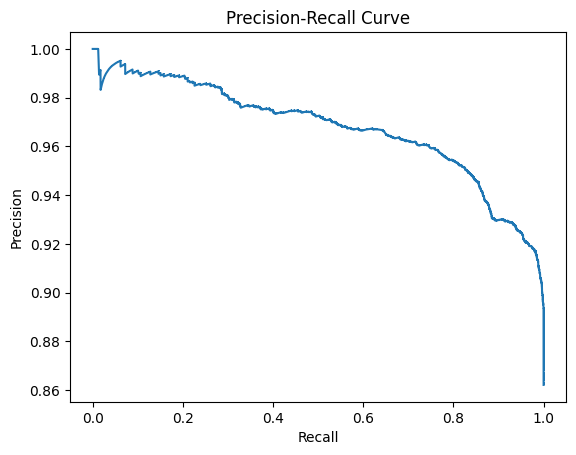

In [18]:
# Получение вероятностей принадлежности к классу 1
y_scores = clf.predict_proba(X_val)[:, 1]

# Рассчитываем precision и recall
precision, recall, _ = precision_recall_curve(y_val_binary, y_scores)

# Строим кривую Precision-Recall
plt.plot(recall, precision, marker=',')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()